In [1]:
import numpy as np
from sugar_analysis import sugar_generator as sg
import sncosmo
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc, rcParams
import cPickle as pkl
from matplotlib import pyplot as plt
from ToolBox import Statistics

In [2]:
ss = sg.sugar_spectrum(parameters_init=np.array([0.38173448,5.33489261,-1.93764582,-0.05565985,37.18092387]))
sugar_analysis_data = '../../sugar_analysis_data/'
result_path = '../../sugar_analysis_data/results/save_plot/simu100sn/'

# Fit a generated light curve with noise

In [3]:
data = ss.AstropyTable_flux(noise_level=0.02)

In [4]:
res, fitted_model = ss.fit_lc_sugar(data)
print res

initialisation
0.0
first iteration
670.431909982
0
670.431909982 94.9398832964
1
94.9398832964 100.638629201
       errors: OrderedDict([('t0', 0.0014253195156186393), ('q1', 0.28522286216719284), ('q2', 0.3774984433650554), ('q3', 0.19537285764586992), ('A', 0.03649053968236453), ('Mgr', 0.03226928605418326)])
   parameters: array([  0.00000000e+00,  -3.05073589e-05,   8.12168554e-01,
         5.39520996e+00,  -1.71614759e+00,  -1.06415321e-01,
         3.72194315e+01,   0.00000000e+00,   3.10000000e+00])
      success: True
    data_mask: array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True

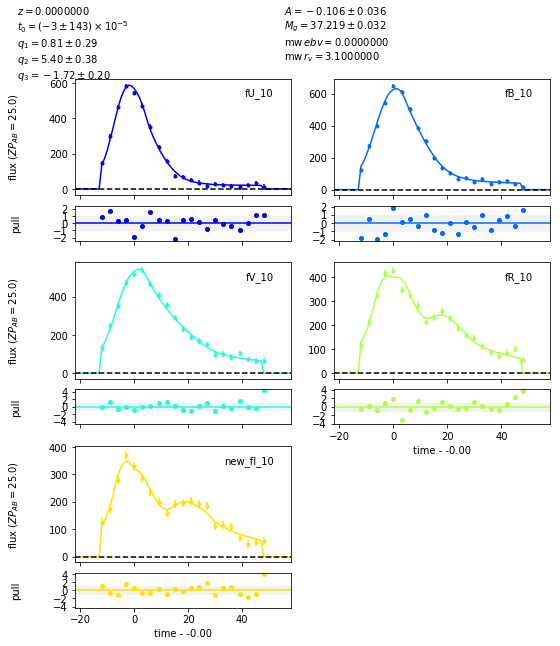

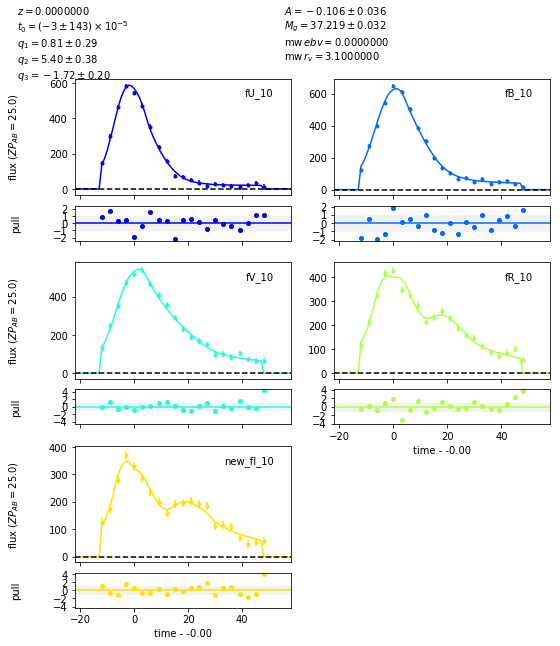

In [6]:
sncosmo.plot_lc(data,fitted_model, errors=res.errors)


# Generating a full simulated sample of SUGAR parameters 

In [7]:
ss.sample_genarator(100)
samples = ss.samples
coefs = ss.coefs

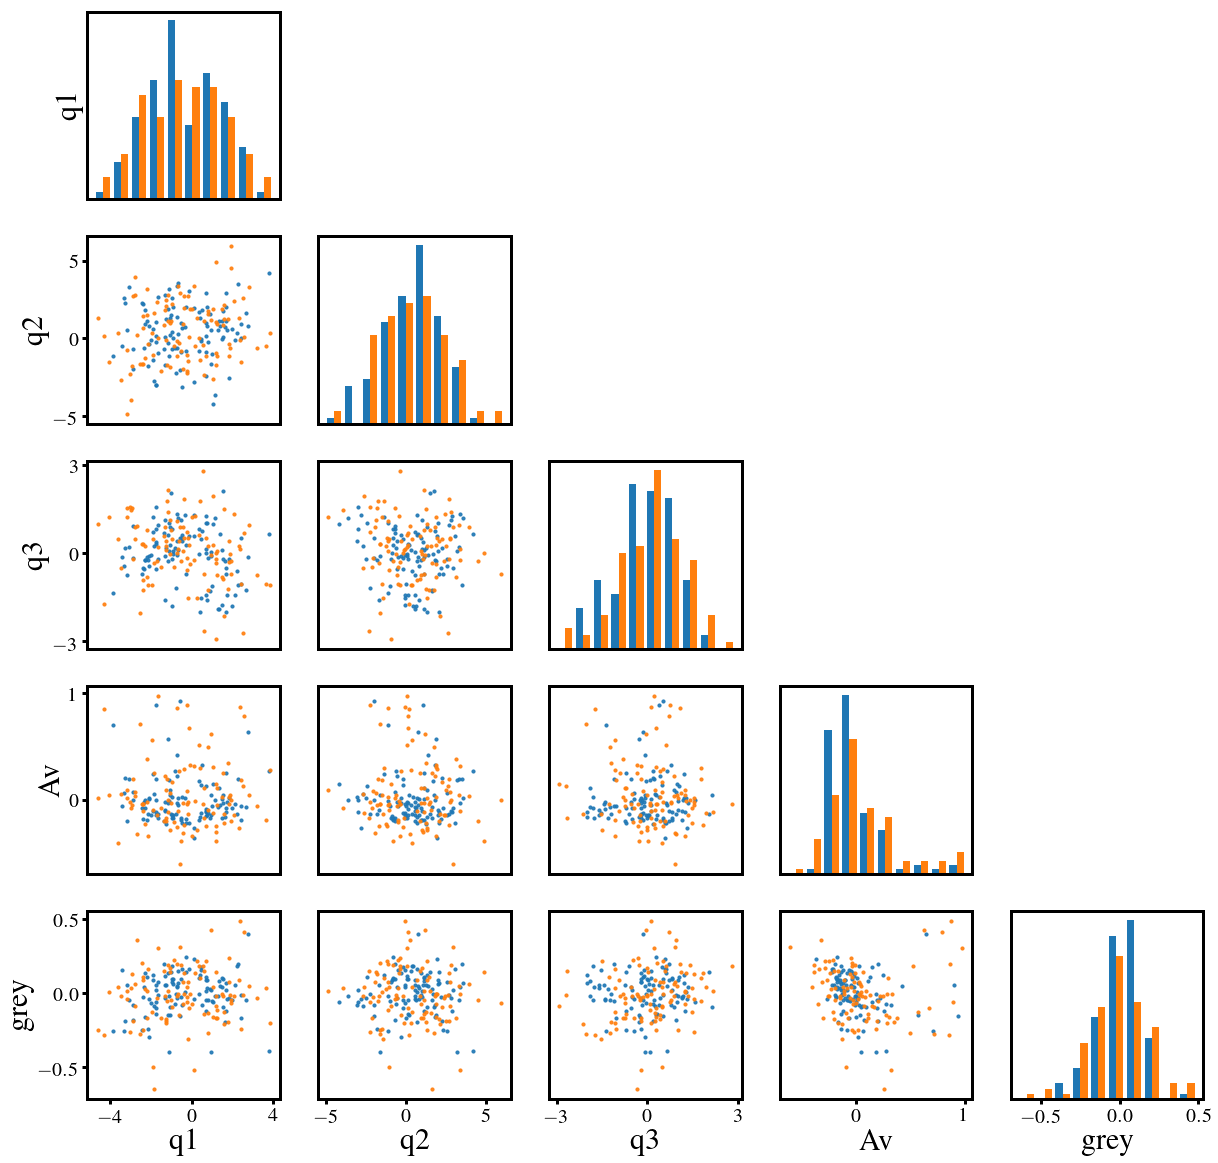

In [8]:
plt.figure(figsize=(20, 20))
rcParams['font.size'] = 20.
font = {'family': 'normal', 'size': 20}
rc('axes', linewidth=3)
rc("text", usetex=True)
rc('font', family='serif')
rc('font', serif='Times')
rc('legend', fontsize=25)
rc('xtick.major', size=5, width=3)
rc('ytick.major', size=5, width=3)
rc('xtick.minor', size=3, width=3)
rc('ytick.minor', size=3, width=3)
for i in range(0, 5):
    for j in range(0, 5):
        if i > j:
            continue
        plt.subplot(5, 5, j*5+i+1)
        if i==j:
            plt.hist([coefs[:, i], samples[:, i]])
        else:
            plt.scatter(coefs[:, i], coefs[:, j], s=10, alpha=0.9)
            plt.scatter(samples[:, i], samples[:, j], s=10, alpha=0.9)
        if i == 0:
            plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=3, integer=True))
            if j==0:
                plt.yticks([])
            plt.ylabel(ss._param_names[j], fontsize=30)
        else:
            plt.yticks([])
        if j == 4:
            plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=3, integer=True))
            plt.xlabel(ss._param_names[i], fontsize=30)
        else:
            plt.xticks([])
plt.show()

In [5]:
samples[:,4] += 37.

# Generate and fit simulated light curves sample with noise 

In [13]:
res = np.zeros([len(samples),6])
res_errors = np.zeros([len(samples),6])
for i, sample in enumerate(samples):
    print str(i)+'/'+str(len(samples)-1)
    ss._parameters = sample
    print ss._parameters
    data = ss.AstropyTable_flux(noise_level=0.02)
    res_phot, fitted_model = ss.fit_lc_sugar(data)
    res[i] = [res_phot.parameters[2], 
              res_phot.parameters[3], 
              res_phot.parameters[4], 
              res_phot.parameters[5], 
              res_phot.parameters[6],
              res_phot.parameters[1]]
    res_errors[i] = [res_phot.errors['q1'],
                     res_phot.errors['q2'],
                     res_phot.errors['q3'],
                     res_phot.errors['A'],
                     res_phot.errors['Mgr'],
                     res_phot.errors['t0']
                    ]
    
dic = {}
dic['True_param'] = samples
dic['fit_param'] = res
dic['fit_param_errors'] = res_errors
pkl.dump(dic, open('./results.pkl','w'))

0/99
[  1.78304475e+00   2.41012606e+00   1.60638141e-02  -1.10975903e-01
   3.69196861e+01]
initialisation
0.0
first iteration
251.139083862
0
251.139083862 87.47921177
1
87.47921177 90.3846104579
1/99
[ -5.16054894  -1.70826643  -0.25974593  -0.04797362  37.34457112]
initialisation
0.0
first iteration
1172.82007513
0
1172.82007513 96.354017775
1
96.354017775 100.273910291
2/99
[  3.28673767  -0.29173971   0.44468232   0.0902465   36.97781994]
initialisation
0.0
first iteration
352.50437526
0
352.50437526 95.955846736
1
95.955846736 104.155784707
3/99
[ -0.07168912  -0.04425035  -0.89982069   0.07151325  37.12370964]
initialisation
0.0
first iteration
135.618476713
0
135.618476713 82.034345744
1
82.034345744 86.0566076063
4/99
[ -2.01421827  -2.01245751   1.95388534   0.39736483  36.92528601]
initialisation
0.0
first iteration
1346.24070559
0
1346.24070559 86.5395427109
1
86.5395427109 91.3541580305
5/99
[  2.52706948  -0.95805018   0.49902785   0.16693434  37.32401774]
initialisation

initialisation
0.0
first iteration
246.847393886
0
246.847393886 86.5942509404
1
86.5942509404 91.6265967357
28/99
[ -1.20767233e+00   2.52069820e+00   1.07045817e-01   3.05527088e-02
   3.70814133e+01]
initialisation
0.0
first iteration
191.335640779
0
191.335640779 87.9713965419
1
87.9713965419 95.031986451
29/99
[ -2.84426667  -3.10477251   2.53603093   0.32269877  36.88776039]
initialisation
0.0
first iteration
2553.06520936
0
2553.06520936 55.1133335664
1
55.1133335664 56.9193856393
30/99
[  1.40720261   1.48868041   1.04790088  -0.09793474  36.94387938]
initialisation
0.0
first iteration
158.714275905
0
158.714275905 88.3757071768
1
88.3757071768 96.7880438196
31/99
[  1.32017048e+00   8.79167311e-01   1.03150134e+00  -2.44701881e-02
   3.72319725e+01]
initialisation
0.0
first iteration
165.025253445
0
165.025253445 101.203453262
1
101.203453262 105.112274861
32/99
[  0.32183274   0.72173173  -1.88045329  -0.22909837  37.25554236]
initialisation
0.0
first iteration
318.119534658


283.419881952 84.4486580569
1
84.4486580569 94.3343673052
55/99
[ -3.39997176e+00   2.44323173e-01   1.53752212e-01  -6.98050379e-03
   3.69744022e+01]
initialisation
0.0
first iteration
526.104791048
0
526.104791048 76.224607892
1
76.224607892 82.727486904
56/99
[  2.03241709   1.60361646   0.5714709   -0.28739174  36.93329646]
initialisation
0.0
first iteration
168.342748029
0
168.342748029 86.0017874138
1
86.0017874138 86.7410334964
57/99
[  0.20536516  -2.28094879   1.17811597   0.08723881  36.94541669]
initialisation
0.0
first iteration
340.551366334
0
340.551366334 91.6364771019
1
91.6364771019 98.6519669749
58/99
[ -0.76632617   0.7860796   -1.60916136   0.06656106  37.11915552]
initialisation
0.0
first iteration
204.518736653
0
204.518736653 80.6054007962
1
80.6054007962 91.9531786999
59/99
[ -1.89564551e-01  -2.65473623e+00  -8.52309993e-01   6.00834751e-03
   3.68131533e+01]
initialisation
0.0
first iteration
119.916706393
0
119.916706393 64.7469079868
1
64.7469079868 66.8508

108.82866915 114.275614536
82/99
[  0.10143851  -1.42089405   0.20468554  -0.15738977  37.11661491]
initialisation
0.0
first iteration
139.217142153
0
139.217142153 99.8314427877
1
99.8314427877 107.568626174
83/99
[ -3.19478357   0.93542158   2.52301206  -0.29915264  37.06194139]
initialisation
0.0
first iteration
1980.64212672
0
1980.64212672 109.482820938
1
109.482820938 112.882562608
84/99
[  3.73930500e+00   1.03582899e+00  -3.18594829e-01   3.36925913e-03
   3.72083103e+01]
initialisation
0.0
first iteration
551.460118481
0
551.460118481 67.0808176433
1
67.0808176433 69.8026194474
85/99
[  0.94156633  -0.20639677  -1.89184915   0.07726333  37.11183366]
initialisation
0.0
first iteration
515.159897494
0
515.159897494 95.4174242481
1
95.4174242481 107.183202315
86/99
[ -2.19585561   0.92702317   0.62063958  -0.27644506  37.02880963]
initialisation
0.0
first iteration
372.782516558
0
372.782516558 89.479120119
1
89.479120119 91.9112157044
87/99
[ -1.51700579  -0.29120939   0.8774925

In [41]:
dic = pkl.load(open('./results.pkl'))
samples = dic['True_param']
res = dic['fit_param']
res_errors = dic['fit_param_errors']
print res

[[  1.72396907e+00   2.14047637e+00  -1.13714318e-01  -8.88193832e-02
    3.68762224e+01  -2.32212898e-03]
 [ -5.23900583e+00  -1.36919407e+00  -4.41003344e-02  -5.30743706e-02
    3.73835708e+01   1.58069638e-02]
 [  3.28090574e+00  -2.52698137e-01   5.57670909e-01   8.62108263e-02
    3.70001209e+01  -1.20782698e-01]
 [ -4.78735735e-01   2.38628718e-02  -9.56303883e-01   1.13515261e-01
    3.71099251e+01  -2.23015277e-01]
 [ -2.27413228e+00  -2.73635821e+00   1.69353778e+00   4.11011350e-01
    3.68994081e+01   4.34133245e-03]
 [  2.38651174e+00  -4.60354202e-01   3.36283247e-01   1.85263282e-01
    3.73113800e+01  -2.70262999e-02]
 [  3.49316970e+00   2.03033552e+00   4.85154074e-01  -4.29564940e-01
    3.70418407e+01  -2.18180284e-02]
 [ -2.13743597e+00   3.18485006e+00   3.78708525e-01   6.72168769e-02
    3.66949106e+01  -2.57812419e-01]
 [  9.14566388e-02   2.38315043e+00  -1.45676286e+00  -2.58135444e-01
    3.70738963e+01   5.51811114e-02]
 [ -1.44348316e-01   2.55217261e+00  

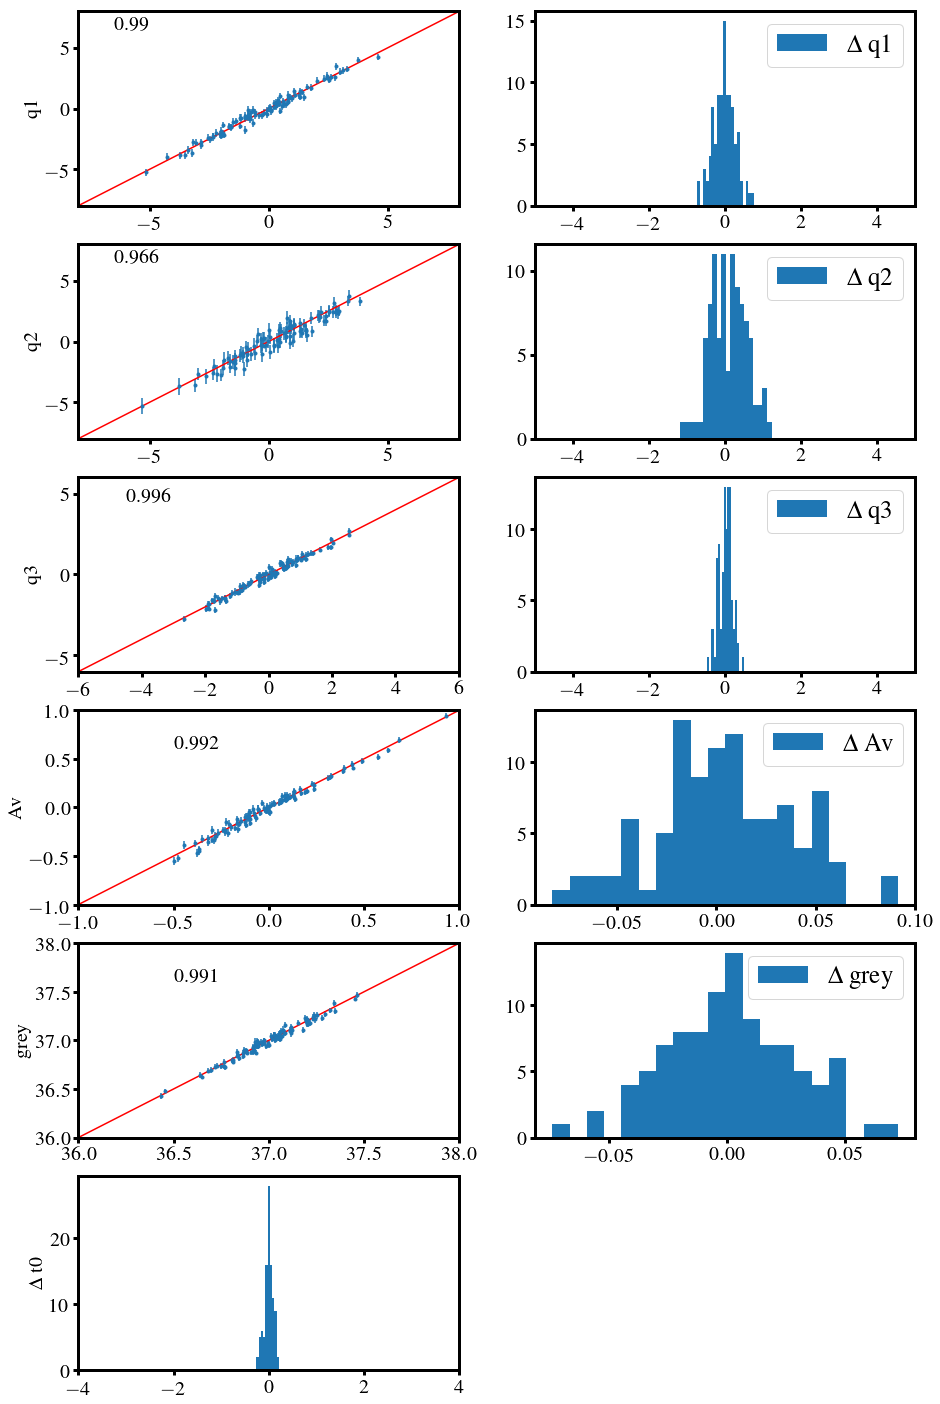

In [42]:
LIM = [8,8,6]

plt.figure(figsize=(15, 25))
t0_init = np.zeros(len(res))
for i in range(6):
    plt.subplot(6, 2, 2*i+1)
    if 2*i+1 < 10:
        plt.plot([-100.,100.],[-100.,100.],color='r')
        plt.ylabel(ss._param_names[i])
        plt.errorbar(samples[:,i], res[:, i], yerr=res_errors[:, i], fmt='.')
        cor = Statistics.correlation_weighted(samples[:,i], res[:, i],w=1./res_errors[:, i])
        if 2*i+1 <= 5:
            plt.text(-LIM[i]+1.5, LIM[i]-1.5, round(cor,3) , fontweight = 'bold', fontsize = 20)
            plt.ylim(-LIM[i],LIM[i])
            plt.xlim(-LIM[i],LIM[i])
        if 2*i+1 == 7:
            plt.text(-0.5, 0.6, round(cor,3) , fontweight = 'bold', fontsize = 20)
            plt.ylim(-1,1.)
            plt.xlim(-1.,1.)   
        if 2*i+1 == 9:
            plt.text(36.5, 37.6, round(cor,3) , fontweight = 'bold', fontsize = 20)
            plt.ylim(36.,38.)
            plt.xlim(36.,38.)  
    if 2*i+1 == 11:
        plt.hist(res[:, i])
        plt.ylabel('$\Delta$ t0')
        plt.xlim(-4,4)
    if 2*(i+1) < 11:
        plt.subplot(6, 2, 2*(i+1))
        plt.hist(samples[:,i]-res[:, i],20, label='$\Delta$ '+ss._param_names[i]) 
        plt.legend()
        if 2*i+1 <= 5:
            plt.xlim(-5,5)

pdffile = result_path+'results_stand.pdf'
plt.savefig(pdffile, bbox_inches='tight')        
plt.show()

# Remove I band

In [22]:
res = np.zeros([len(samples),6])
res_errors = np.zeros([len(samples),6])
for i, sample in enumerate(samples):
    print str(i)+'/'+str(len(samples)-1)
    ss._parameters = sample
    print ss._parameters
    data = ss.AstropyTable_flux(noise_level=0.02, band_used=['fB_10','fV_10','fR_10','fU_10'])
    res_phot, fitted_model = ss.fit_lc_sugar(data)
    res[i] = [res_phot.parameters[2], 
              res_phot.parameters[3], 
              res_phot.parameters[4], 
              res_phot.parameters[5], 
              res_phot.parameters[6],
              res_phot.parameters[1]]
    res_errors[i] = [res_phot.errors['q1'],
                     res_phot.errors['q2'],
                     res_phot.errors['q3'],
                     res_phot.errors['A'],
                     res_phot.errors['Mgr'],
                     res_phot.errors['t0']
                    ]
    
dic = {}
dic['True_param'] = samples
dic['fit_param'] = res
dic['fit_param_errors'] = res_errors
pkl.dump(dic, open('./results_mI.pkl','w'))

0/99
[  1.78304475e+00   2.41012606e+00   1.60638141e-02  -1.10975903e-01
   3.69196861e+01]
initialisation
0.0
first iteration
197.522638113
0
197.522638113 91.0841367419
1
91.0841367419 94.1236945759
1/99
[ -5.16054894  -1.70826643  -0.25974593  -0.04797362  37.34457112]
initialisation
0.0
first iteration
949.462021029
0
949.462021029 61.8427755586
1
61.8427755586 67.564163897
2/99
[  3.28673767  -0.29173971   0.44468232   0.0902465   36.97781994]
initialisation
0.0
first iteration
269.529435296
0
269.529435296 52.1975832954
1
52.1975832954 55.2694552242
3/99
[ -0.07168912  -0.04425035  -0.89982069   0.07151325  37.12370964]
initialisation
0.0
first iteration
99.3152403414
0
99.3152403414 74.2336953068
1
74.2336953068 75.4059988802
4/99
[ -2.01421827  -2.01245751   1.95388534   0.39736483  36.92528601]
initialisation
0.0
first iteration
1117.80635286
0
1117.80635286 77.0934410113
1
77.0934410113 78.7547983474
5/99
[  2.52706948  -0.95805018   0.49902785   0.16693434  37.32401774]
ini

initialisation
0.0
first iteration
173.501071795
0
173.501071795 61.0314013501
1
61.0314013501 69.3207432988
28/99
[ -1.20767233e+00   2.52069820e+00   1.07045817e-01   3.05527088e-02
   3.70814133e+01]
initialisation
0.0
first iteration
130.854449277
0
130.854449277 53.0944851293
1
53.0944851293 54.7112787974
29/99
[ -2.84426667  -3.10477251   2.53603093   0.32269877  36.88776039]
initialisation
0.0
first iteration
2217.43194343
0
2217.43194343 60.0740963871
1
60.0740963871 67.2554355526
30/99
[  1.40720261   1.48868041   1.04790088  -0.09793474  36.94387938]
initialisation
0.0
first iteration
126.779695264
0
126.779695264 65.1159317564
1
65.1159317564 66.3603882523
31/99
[  1.32017048e+00   8.79167311e-01   1.03150134e+00  -2.44701881e-02
   3.72319725e+01]
initialisation
0.0
first iteration
121.996831544
0
121.996831544 77.3065724904
1
77.3065724904 79.8508987982
32/99
[  0.32183274   0.72173173  -1.88045329  -0.22909837  37.25554236]
initialisation
0.0
first iteration
289.312956975

246.529080531 77.7613495822
1
77.7613495822 81.6897063343
55/99
[ -3.39997176e+00   2.44323173e-01   1.53752212e-01  -6.98050379e-03
   3.69744022e+01]
initialisation
0.0
first iteration
448.507821661
0
448.507821661 58.090740772
1
58.090740772 61.6871439379
56/99
[  2.03241709   1.60361646   0.5714709   -0.28739174  36.93329646]
initialisation
0.0
first iteration
142.536013027
0
142.536013027 66.3036973265
1
66.3036973265 72.7304930807
57/99
[  0.20536516  -2.28094879   1.17811597   0.08723881  36.94541669]
initialisation
0.0
first iteration
226.902663572
0
226.902663572 57.7115517186
1
57.7115517186 60.2336783947
58/99
[ -0.76632617   0.7860796   -1.60916136   0.06656106  37.11915552]
initialisation
0.0
first iteration
225.567381427
0
225.567381427 84.2373788642
1
84.2373788642 86.1940213205
59/99
[ -1.89564551e-01  -2.65473623e+00  -8.52309993e-01   6.00834751e-03
   3.68131533e+01]
initialisation
0.0
first iteration
119.570884856
0
119.570884856 77.322503228
1
77.322503228 79.51285

75.5142986399 78.4067852482
82/99
[  0.10143851  -1.42089405   0.20468554  -0.15738977  37.11661491]
initialisation
0.0
first iteration
82.7648403286
0
82.7648403286 67.7005365355
1
67.7005365355 69.0555086837
83/99
[ -3.19478357   0.93542158   2.52301206  -0.29915264  37.06194139]
initialisation
0.0
first iteration
1970.22284553
0
1970.22284553 71.5218929648
1
71.5218929648 78.148959899
84/99
[  3.73930500e+00   1.03582899e+00  -3.18594829e-01   3.36925913e-03
   3.72083103e+01]
initialisation
0.0
first iteration
427.364250115
0
427.364250115 83.6284523805
1
83.6284523805 88.150317747
85/99
[  0.94156633  -0.20639677  -1.89184915   0.07726333  37.11183366]
initialisation
0.0
first iteration
360.114262592
0
360.114262592 78.9161473248
1
78.9161473248 82.5260266183
86/99
[ -2.19585561   0.92702317   0.62063958  -0.27644506  37.02880963]
initialisation
0.0
first iteration
385.300526195
0
385.300526195 74.4263004375
1
74.4263004375 76.1823182174
87/99
[ -1.51700579  -0.29120939   0.877492

In [39]:
dic = pkl.load(open('./results_mI.pkl'))
samples = dic['True_param']
res = dic['fit_param']
res_errors = dic['fit_param_errors']
print res

[[  2.07528550e+00   3.03809667e+00   3.07756222e-01  -1.26804153e-01
    3.69501761e+01   4.32860685e-02]
 [ -5.19043412e+00  -1.48494190e+00  -2.37351393e-01  -3.13862918e-02
    3.73317235e+01   1.89357207e-02]
 [  3.43910239e+00   1.78059147e-01   4.61219234e-01   1.17429517e-01
    3.69527812e+01   2.05427953e-01]
 [  1.20200490e-01   9.43099685e-01  -4.18764549e-01   5.18529985e-02
    3.71945836e+01  -3.21396514e-02]
 [ -2.02321608e+00  -1.04300029e+00   1.97880811e+00   4.05734414e-01
    3.69386458e+01  -2.47998794e-04]
 [  2.51372786e+00  -2.02103146e+00   6.96591523e-01   1.49070614e-01
    3.73397181e+01   9.28831542e-02]
 [  2.61237077e+00   1.86900914e+00  -2.76130621e-01  -3.40573280e-01
    3.69696039e+01   1.07023235e-03]
 [ -2.25729071e+00   2.02504324e+00   4.24514086e-01   6.91633826e-02
    3.66673112e+01  -3.85848913e-02]
 [  1.34887030e-01   3.14965968e+00  -1.47598244e+00  -2.60819686e-01
    3.71002703e+01   5.38745002e-02]
 [ -8.69770450e-02   3.33407390e+00  

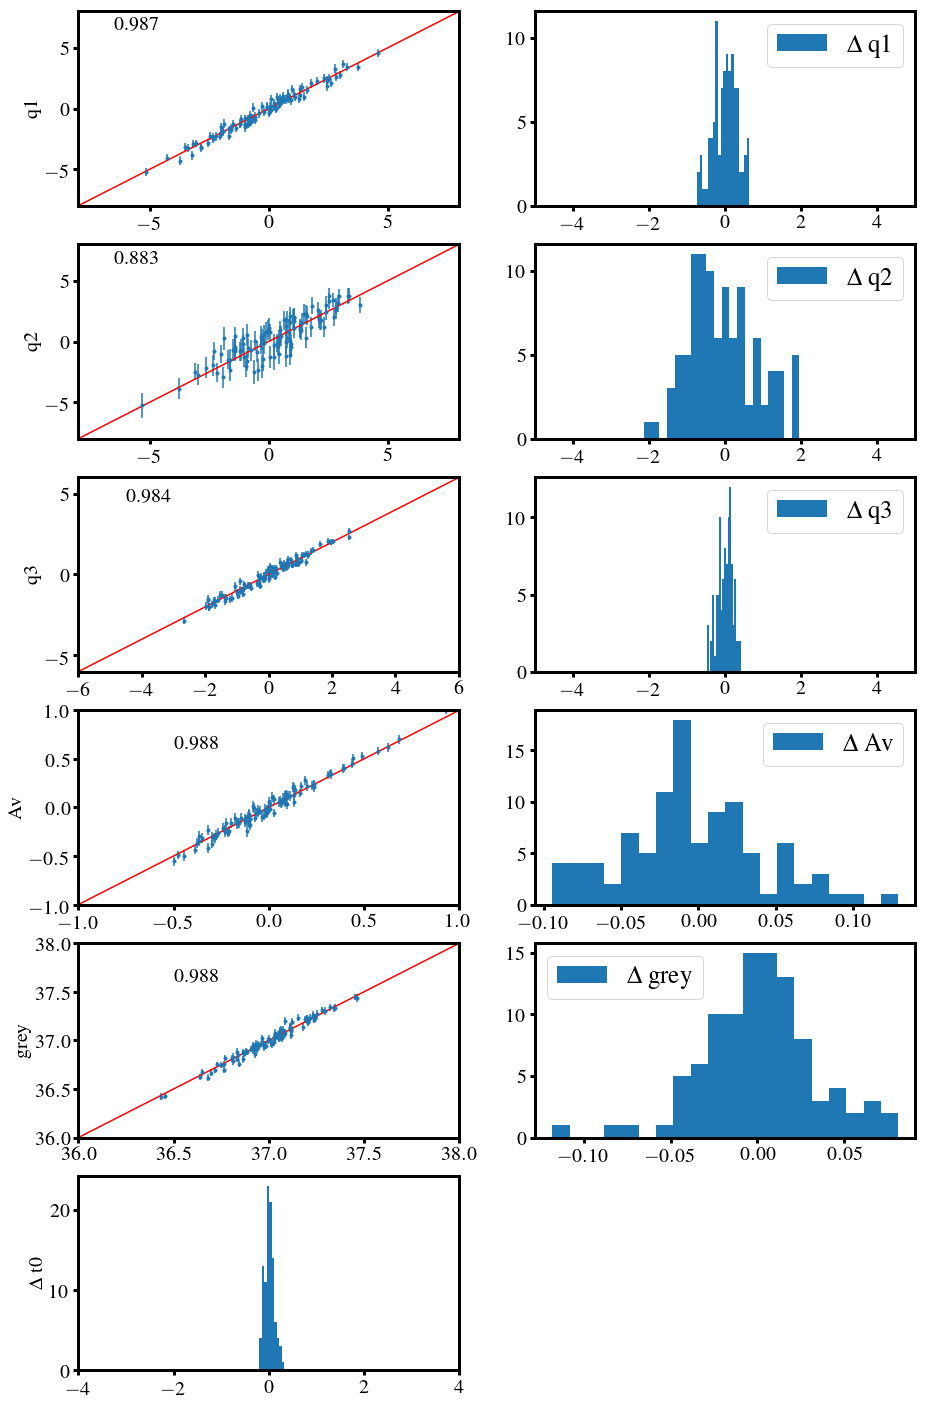

In [40]:
LIM = [8,8,6]

plt.figure(figsize=(15, 25))
t0_init = np.zeros(len(res))
for i in range(6):
    plt.subplot(6, 2, 2*i+1)
    if 2*i+1 < 10:
        plt.plot([-100.,100.],[-100.,100.],color='r')
        plt.ylabel(ss._param_names[i])
        plt.errorbar(samples[:,i], res[:, i], yerr=res_errors[:, i], fmt='.')
        cor = Statistics.correlation_weighted(samples[:,i], res[:, i],w=1./res_errors[:, i])
        if 2*i+1 <= 5:
            plt.text(-LIM[i]+1.5, LIM[i]-1.5, round(cor,3) , fontweight = 'bold', fontsize = 20)
            plt.ylim(-LIM[i],LIM[i])
            plt.xlim(-LIM[i],LIM[i])
        if 2*i+1 == 7:
            plt.text(-0.5, 0.6, round(cor,3) , fontweight = 'bold', fontsize = 20)
            plt.ylim(-1,1.)
            plt.xlim(-1.,1.)   
        if 2*i+1 == 9:
            plt.text(36.5, 37.6, round(cor,3) , fontweight = 'bold', fontsize = 20)
            plt.ylim(36.,38.)
            plt.xlim(36.,38.)  
    if 2*i+1 == 11:
        plt.hist(res[:, i])
        plt.ylabel('$\Delta$ t0')
        plt.xlim(-4,4)
    if 2*(i+1) < 11:
        plt.subplot(6, 2, 2*(i+1))
        plt.hist(samples[:,i]-res[:, i],20, label='$\Delta$ '+ss._param_names[i]) 
        plt.legend()
        if 2*i+1 <= 5:
            plt.xlim(-5,5)
            
pdffile = result_path+'results_mI.pdf'
plt.savefig(pdffile, bbox_inches='tight')
plt.show()
plt.show()

# Simulated data with SNF phase coverage and cadence

In [6]:
meta = pkl.load(open(sugar_analysis_data+'META-CABALLO2.pkl'))
sn_dic =  {}
for sn_name in meta.keys():
    if meta[sn_name]['idr.subset'] != 'bad' and meta[sn_name]['idr.subset'] != 'auxiliary':
        sn_dic[sn_name] = meta[sn_name]
print len(sn_dic)

225


In [7]:
nb_sn = 100 #nb_sn < len(sn_dic)
ss.sample_genarator(nb_sn)
samples = ss.samples
coefs = ss.coefs

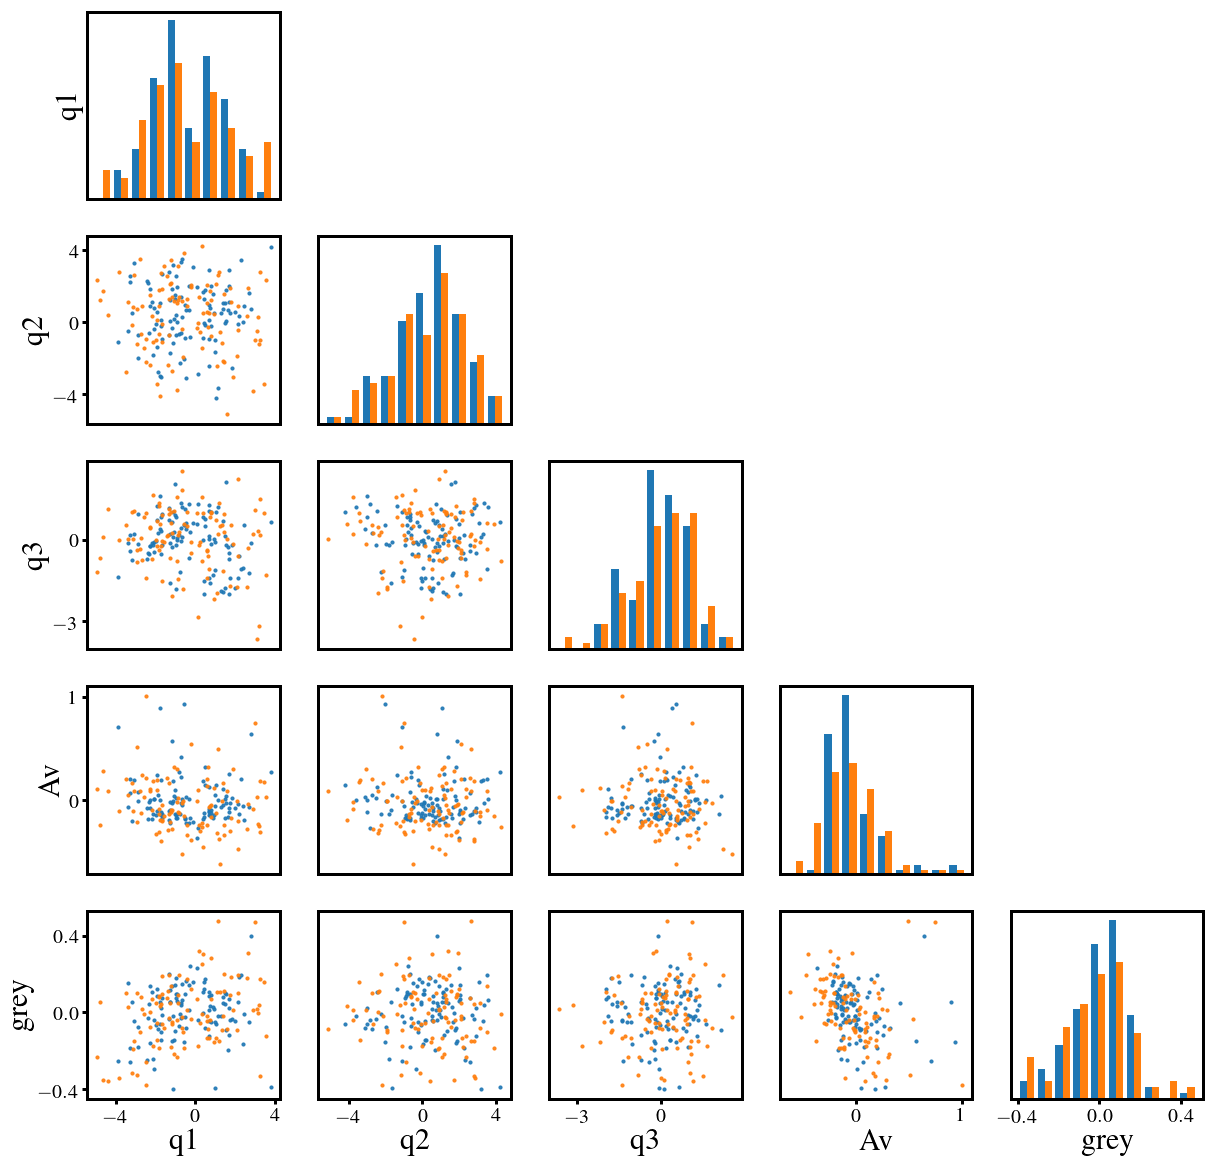

In [8]:
plt.figure(figsize=(20, 20))
for i in range(0, 5):
    for j in range(0, 5):
        if i > j:
            continue
        plt.subplot(5, 5, j*5+i+1)
        if i==j:
            plt.hist([coefs[:, i], samples[:, i]])
        else:
            plt.scatter(coefs[:, i], coefs[:, j], s=10, alpha=0.9)
            plt.scatter(samples[:, i], samples[:, j], s=10, alpha=0.9)
        if i == 0:
            plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=3, integer=True))
            if j==0:
                plt.yticks([])
            plt.ylabel(ss._param_names[j], fontsize=30)
        else:
            plt.yticks([])
        if j == 4:
            plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=3, integer=True))
            plt.xlabel(ss._param_names[i], fontsize=30)
        else:
            plt.xticks([])
plt.show()
samples[:,4] += 37.

In [9]:
res = np.zeros([len(samples),6])
res_errors = np.zeros([len(samples),6])
for i, sn_name in enumerate(sn_dic.keys()[:nb_sn]) :
    sn_data = meta[sn_name]['spectra']
    phase = []
    for t in sn_data.keys():
        phase.append(meta[sn_name]['salt2.DayMax'] - sn_data[t]['obs.mjd'])
    print str(i)+'/'+str(len(samples)-1)
    ss._parameters = samples[i]
    print ss._parameters
    data = ss.AstropyTable_flux(noise_level=0.02, phase=phase)
    res_phot, fitted_model = ss.fit_lc_sugar(data)
    res[i] = [res_phot.parameters[2], 
              res_phot.parameters[3], 
              res_phot.parameters[4], 
              res_phot.parameters[5], 
              res_phot.parameters[6],
              res_phot.parameters[1]]
    res_errors[i] = [res_phot.errors['q1'],
                     res_phot.errors['q2'],
                     res_phot.errors['q3'],
                     res_phot.errors['A'],
                     res_phot.errors['Mgr'],
                     res_phot.errors['t0']
                    ]
dic = {}
dic['True_param'] = samples
dic['fit_param'] = res
dic['fit_param_errors'] = res_errors
pkl.dump(dic, open('./results_pSNF.pkl','w'))

0/99
[  1.76952324   1.88613287  -1.69548187  -0.30268937  37.08852977]
initialisation
0.0
first iteration
192.675100434
0
192.675100434 22.2587611995
1
22.2587611995 22.2587581885
2
22.2587581885 22.2587582025
1/99
[  1.09021386  -2.41374825  -1.96825332  -0.32225847  37.10536209]
initialisation
0.0
first iteration
111.050350746
0
111.050350746 9.15745051708
1
9.15745051708 9.1575492582
2/99
[  6.06282280e-02  -3.19740754e-01   9.60518956e-01  -9.57029760e-03
   3.70688058e+01]
initialisation
0.0
first iteration
75.0991616997
0
75.0991616997 17.3554355268
1
17.3554355268 17.3556190524
3/99
[ -2.77914006   3.51487518  -0.36114862   0.08422739  36.89601591]
initialisation
0.0
first iteration
139.921414877
0
139.921414877 33.094242508
1
33.094242508 33.0941694649
2
33.0941694649 33.0941694498
3
33.0941694498 33.0941694495
4
33.0941694495 33.0941694495
5
33.0941694495 33.0941694499
4/99
[ -1.39960416  -2.34891609   0.16871049  -0.29181656  37.10980779]
initialisation
0.0
first iteration
1

initialisation
0.0
first iteration
223.681377207
0
223.681377207 8.08507846035
1
8.08507846035 8.08512889929
21/99
[  2.60035883   0.33310599  -1.74833242  -0.28330016  37.17690745]
initialisation
0.0
first iteration
209.849895739
0
209.849895739 12.7732215685
1
12.7732215685 12.7732532805
22/99
[ -1.65653364  -1.07755217  -1.53595624  -0.20588853  37.18697246]
initialisation
0.0
first iteration
168.052748937
0
168.052748937 63.2165302554
1
63.2165302554 63.2165264921
2
63.2165264921 63.2165264921
3
63.2165264921 63.2165264921
23/99
[ -1.82664478  -0.63755909   1.34097998  -0.08581843  37.08515105]
initialisation
0.0
first iteration
381.309450436
0
381.309450436 24.4242034803
1
24.4242034803 24.4242029592
2
24.4242029592 24.4242029592
3
24.4242029592 24.4242029592
24/99
[ -1.83515838   1.81812779   1.23646768  -0.30565353  37.08042807]
initialisation
0.0
first iteration
232.395354085
0
232.395354085 37.8299381914
1
37.8299381914 37.8299378869
2
37.8299378869 37.8299378879
25/99
[  2.15

142.783053884 24.6462750433
1
24.6462750433 24.6462672315
2
24.6462672315 24.6462672314
3
24.6462672314 24.6462672314
40/99
[ -2.11641899  -1.10187994   1.63908243   0.18904643  36.82518916]
initialisation
0.0
first iteration
268.826049783
0
268.826049783 7.35761821554
1
7.35761821554 7.35761231041
2
7.35761231041 7.35759625568
3
7.35759625568 7.35755963381
4
7.35755963381 7.35760534702
41/99
[ -1.16535227   1.39988665  -2.05653069  -0.09545113  36.95064202]
initialisation
0.0
first iteration
92.693092568
0
92.693092568 9.42838844501
1
9.42838844501 9.42830961526
2
9.42830961526 9.42830960625
3
9.42830960625 9.42830960627
42/99
[ -4.40955567   0.40614189   1.12295272   0.08749284  36.63879151]
initialisation
0.0
first iteration
727.645801673
0
727.645801673 60.4469091462
1
60.4469091462 60.4469022502
2
60.4469022502 60.4469022493
3
60.4469022493 60.4469022493
43/99
[ -2.18722532   0.35210012  -0.70736752  -0.09839657  37.06974576]
initialisation
0.0
first iteration
131.62876681
0
131.6

300.237264918 44.6947404531
1
44.6947404531 44.6946931418
2
44.6946931418 44.6946931402
3
44.6946931402 44.6946931402
4
44.6946931402 44.6946931402
58/99
[  1.77754787   1.13072788   0.54742299  -0.17037626  37.18500742]
initialisation
0.0
first iteration
122.46328278
0
122.46328278 26.4956797162
1
26.4956797162 26.4956770664
2
26.4956770664 26.4956770652
3
26.4956770652 26.4956770653
59/99
[  3.21716764  -1.21556856  -3.15951449  -0.24677889  37.03733899]
initialisation
0.0
first iteration
413.043319819
0
413.043319819 28.5521201697
1
28.5521201697 28.5522800622
60/99
[ -1.40719492   2.57755667   0.121587     0.21755776  37.07501082]
initialisation
0.0
first iteration
128.5226703
0
128.5226703 32.9953971426
1
32.9953971426 32.9953149295
2
32.9953149295 32.9953149266
3
32.9953149266 32.9953149266
4
32.9953149266 32.9953149266
61/99
[  1.61018151e+00  -5.08888805e+00   2.02028585e-02   8.90668953e-02
   3.69109560e+01]
initialisation
0.0
first iteration
66.6027658369
0
66.6027658369 4.2

873.579735044 45.0984073573
1
45.0984073573 45.0984020364
2
45.0984020364 45.0984020364
78/99
[ -0.80307084   1.43851631   0.26930255  -0.1287381   37.19567933]
initialisation
0.0
first iteration
49.9938482436
0
49.9938482436 15.6239097586
1
15.6239097586 15.623904431
2
15.623904431 15.6239043864
3
15.6239043864 15.623904385
4
15.623904385 15.6239043866
79/99
[ -3.36729610e+00   1.14561260e+00   2.05642399e-02   4.45111084e-02
   3.70284215e+01]
initialisation
0.0
first iteration
164.147482972
0
164.147482972 14.5211574772
1
14.5211574772 14.5210793805
2
14.5210793805 14.5210800681
80/99
[ -3.84504939e+00   2.81430588e+00   3.17477362e-03  -1.03253921e-01
   3.66555393e+01]
initialisation
0.0
first iteration
136.807443792
0
136.807443792 15.7293989263
1
15.7293989263 15.7293966588
2
15.7293966588 15.7293968348
81/99
[ -0.4294873    1.28919214   1.03376799  -0.33728554  37.17506562]
initialisation
0.0
first iteration
100.045215075
0
100.045215075 20.3132885169
1
20.3132885169 20.3131931

182.065885667 6.7656391729
1
6.7656391729 6.76558504562
2
6.76558504562 6.76558503763
3
6.76558503763 6.76558503824
99/99
[ -1.22855581   3.48141508   0.60417981  -0.09951302  37.13472915]
initialisation
0.0
first iteration
78.4275411062
0
78.4275411062 5.4672909462
1
5.4672909462 5.46729071092
2
5.46729071092 5.46729049081
3
5.46729049081 5.46729049232


In [36]:
dic = pkl.load(open('./results_pSNF.pkl'))
samples = dic['True_param']
res = dic['fit_param']
res_errors = dic['fit_param_errors']
print res

[[  1.47148192e+00   2.09038758e+00  -1.63915375e+00  -2.27217899e-01
    3.70314571e+01  -4.01908183e-03]
 [ -1.19509986e-01  -2.69740604e+00  -2.11293846e+00  -2.23469255e-01
    3.70810002e+01   2.41355778e-01]
 [  1.36442710e-01  -4.90725001e-01   1.22714331e+00  -4.67938351e-02
    3.71147689e+01   3.06959835e-01]
 [ -2.52130494e+00   3.42600392e+00  -2.58855040e-01   1.25524945e-02
    3.69644616e+01   4.63945396e-02]
 [ -1.19162734e+00  -1.66618339e+00   1.43981158e+00  -3.05538794e-01
    3.71892671e+01   9.05088745e-01]
 [  1.19437894e-01   1.43736039e+00  -1.52793033e+00   1.71802235e-01
    3.68600552e+01   5.24323992e-02]
 [  2.38805473e+00  -3.75776568e+00  -1.81201357e+00   5.20286654e-02
    3.68536974e+01  -1.77569360e+00]
 [ -8.14119621e-01  -1.08413046e+00  -4.37375780e-01  -1.91678236e-01
    3.68853756e+01   5.36766206e-02]
 [  3.56633687e+00   4.18066087e-01   1.51865206e-01  -2.53446266e-01
    3.69818759e+01  -4.14085976e-01]
 [  1.20266085e+00   1.96987004e+00  

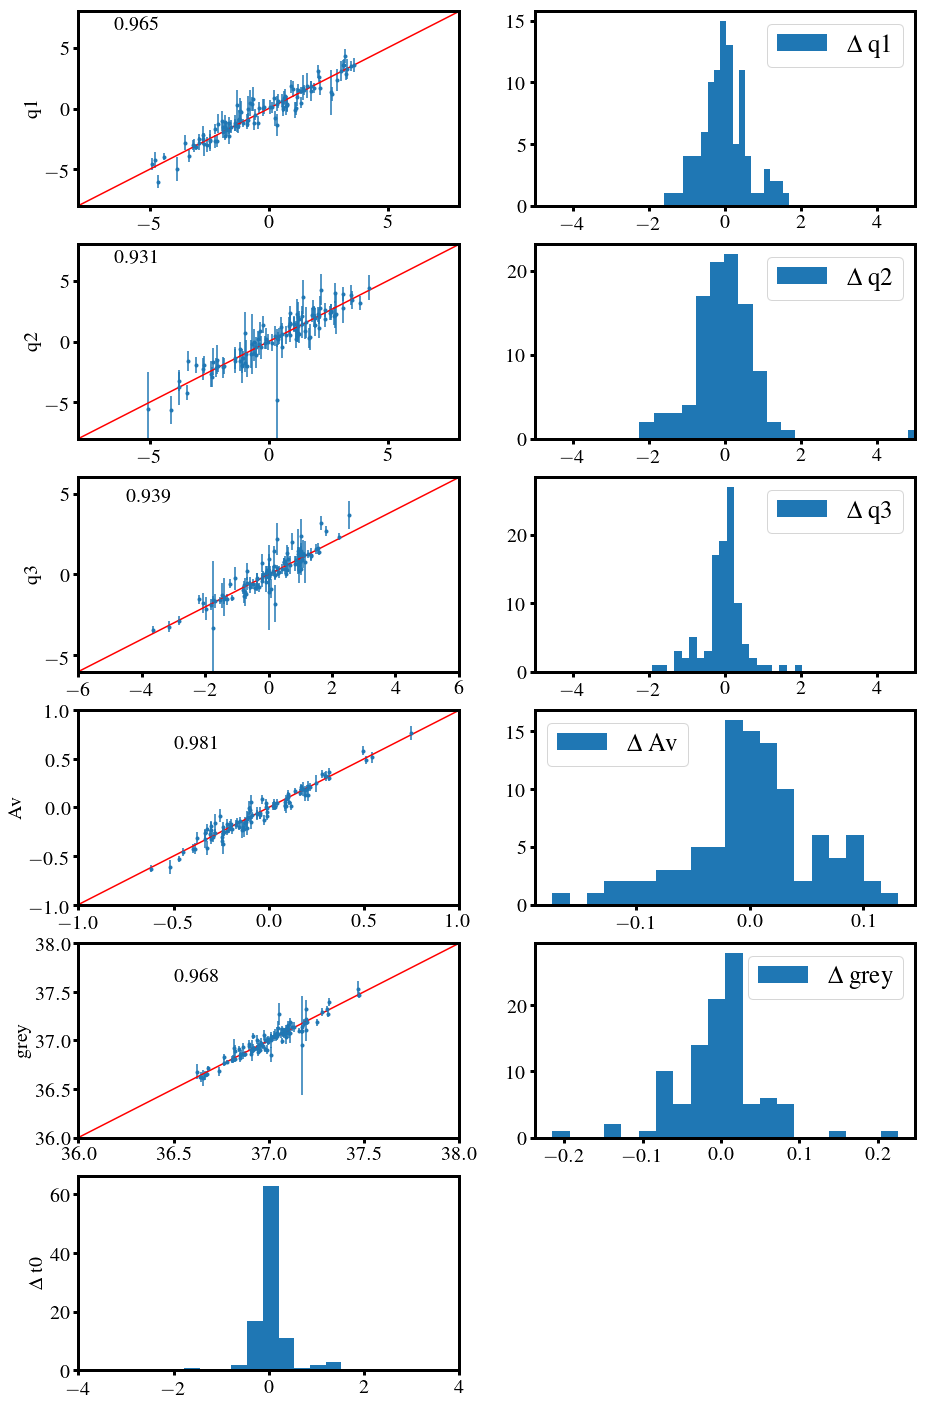

In [38]:
LIM = [8,8,6]

plt.figure(figsize=(15, 25))
t0_init = np.zeros(len(res))
for i in range(6):
    plt.subplot(6, 2, 2*i+1)
    if 2*i+1 < 10:
        plt.plot([-100.,100.],[-100.,100.],color='r')
        plt.ylabel(ss._param_names[i])
        plt.errorbar(samples[:,i], res[:, i], yerr=res_errors[:, i], fmt='.')
        cor = Statistics.correlation_weighted(samples[:,i], res[:, i],w=1./res_errors[:, i])
        if 2*i+1 <= 5:
            plt.text(-LIM[i]+1.5, LIM[i]-1.5, round(cor,3) , fontweight = 'bold', fontsize = 20)
            plt.ylim(-LIM[i],LIM[i])
            plt.xlim(-LIM[i],LIM[i])
        if 2*i+1 == 7:
            plt.text(-0.5, 0.6, round(cor,3) , fontweight = 'bold', fontsize = 20)
            plt.ylim(-1,1.)
            plt.xlim(-1.,1.)   
        if 2*i+1 == 9:
            plt.text(36.5, 37.6, round(cor,3) , fontweight = 'bold', fontsize = 20)
            plt.ylim(36.,38.)
            plt.xlim(36.,38.)  
    if 2*i+1 == 11:
        plt.hist(res[:, i])
        plt.ylabel('$\Delta$ t0')
        plt.xlim(-4,4)
    if 2*(i+1) < 11:
        plt.subplot(6, 2, 2*(i+1))
        plt.hist(samples[:,i]-res[:, i],20, label='$\Delta$ '+ss._param_names[i]) 
        plt.legend()
        if 2*i+1 <= 5:
            plt.xlim(-5,5)
        
pdffile = result_path+'results_pSNF.pdf'
plt.savefig(pdffile, bbox_inches='tight')
plt.show()

# Simulated data with SNF phase coverage and cadence BVR

In [3]:
meta = pkl.load(open(sugar_analysis_data+'META-CABALLO2.pkl'))
sn_dic =  {}
for sn_name in meta.keys():
    if meta[sn_name]['idr.subset'] != 'bad' and meta[sn_name]['idr.subset'] != 'auxiliary':
        sn_dic[sn_name] = meta[sn_name]
print len(sn_dic)

225


In [4]:
nb_sn = 100 #nb_sn < len(sn_dic)
ss.sample_genarator(nb_sn)
samples = ss.samples
coefs = ss.coefs

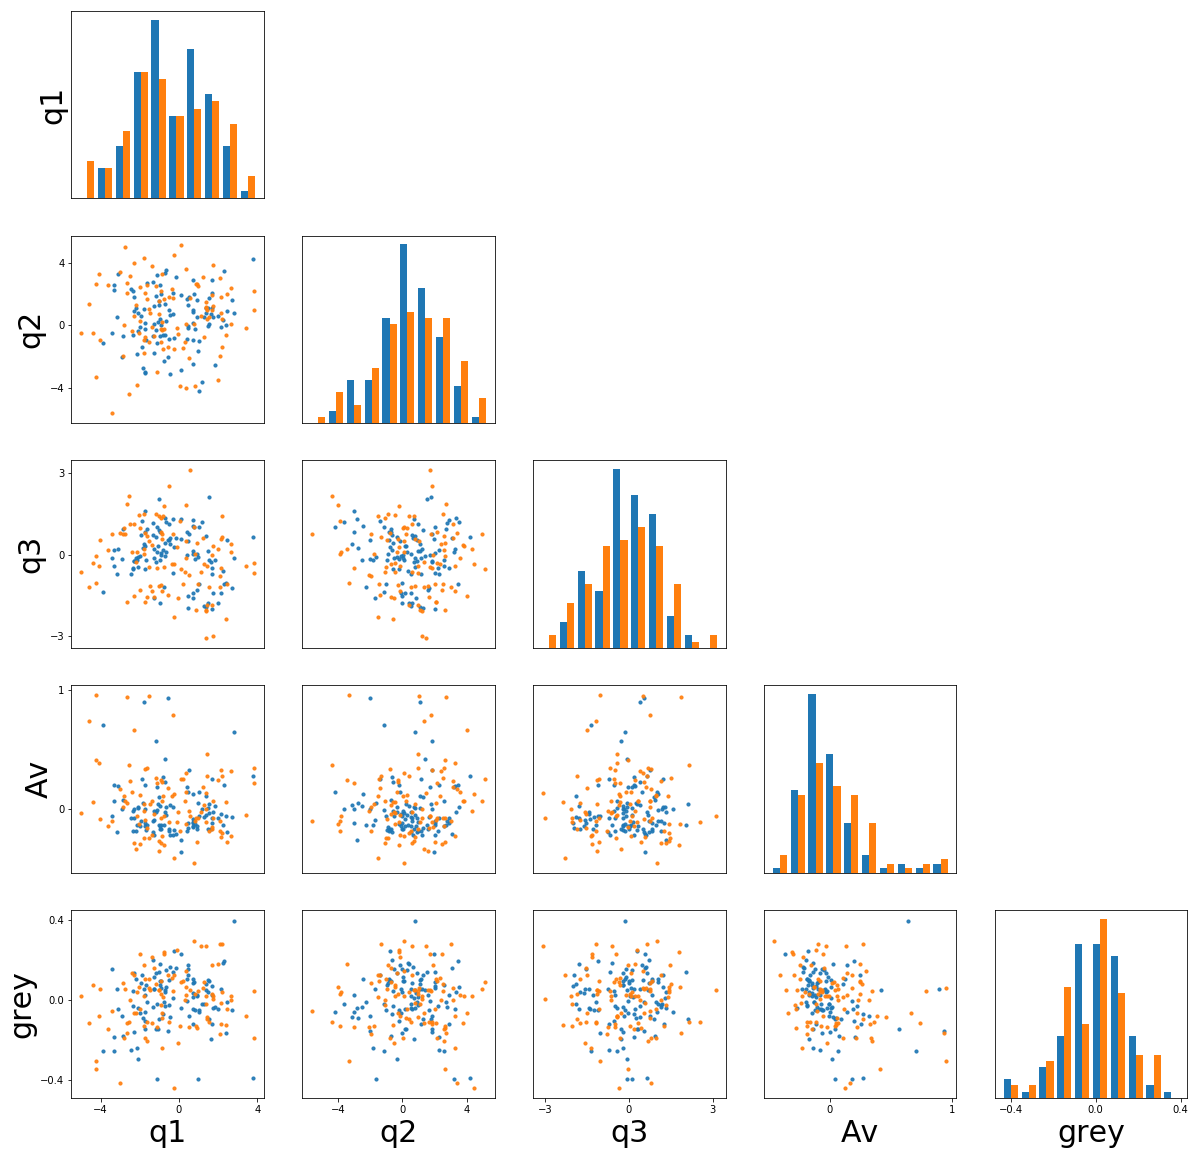

In [5]:
plt.figure(figsize=(20, 20))
for i in range(0, 5):
    for j in range(0, 5):
        if i > j:
            continue
        plt.subplot(5, 5, j*5+i+1)
        if i==j:
            plt.hist([coefs[:, i], samples[:, i]])
        else:
            plt.scatter(coefs[:, i], coefs[:, j], s=10, alpha=0.9)
            plt.scatter(samples[:, i], samples[:, j], s=10, alpha=0.9)
        if i == 0:
            plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=3, integer=True))
            if j==0:
                plt.yticks([])
            plt.ylabel(ss._param_names[j], fontsize=30)
        else:
            plt.yticks([])
        if j == 4:
            plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=3, integer=True))
            plt.xlabel(ss._param_names[i], fontsize=30)
        else:
            plt.xticks([])
plt.show()
samples[:,4] += 37.

In [6]:
res = np.zeros([len(samples),6])
res_errors = np.zeros([len(samples),6])
for i, sn_name in enumerate(sn_dic.keys()[:nb_sn]) :
    sn_data = meta[sn_name]['spectra']
    phase = []
    for t in sn_data.keys():
        phase.append(meta[sn_name]['salt2.DayMax'] - sn_data[t]['obs.mjd'])
    print str(i)+'/'+str(len(samples)-1)
    ss._parameters = samples[i]
    print ss._parameters
    data = ss.AstropyTable_flux(noise_level=0.02, phase=phase, band_used=['fB_10','fV_10','fR_10'])
    res_phot, fitted_model = ss.fit_lc_sugar(data)
    res[i] = [res_phot.parameters[2], 
              res_phot.parameters[3], 
              res_phot.parameters[4], 
              res_phot.parameters[5], 
              res_phot.parameters[6],
              res_phot.parameters[1]]
    res_errors[i] = [res_phot.errors['q1'],
                     res_phot.errors['q2'],
                     res_phot.errors['q3'],
                     res_phot.errors['A'],
                     res_phot.errors['Mgr'],
                     res_phot.errors['t0']
                    ]
dic = {}
dic['True_param'] = samples
dic['fit_param'] = res
dic['fit_param_errors'] = res_errors
pkl.dump(dic, open('./results_pSNFBVR.pkl','w'))

0/99
[  0.91499325   2.65850924   0.43837029  -0.27578449  36.85932506]
initialisation
0.0
first iteration
39.5295339007
0
39.5295339007 13.9879320599
1
13.9879320599 13.9879202337
2
13.9879202337 13.9879456003
1/99
[ -1.97193894   0.27280545   0.983544     0.11363743  36.95528327]
initialisation
0.0
first iteration
57.9257045029
0
57.9257045029 6.71718028524
1
6.71718028524 6.7171459784
2
6.7171459784 6.71714628231
2/99
[ -1.37581061   3.7867223    0.3388978    0.06703374  36.88565442]
initialisation
0.0
first iteration
47.3318875621
0
47.3318875621 7.54874586727
1
7.54874586727 276.376162777
3/99
[ -0.81666501  -1.50197025   1.41491651   0.10576442  37.01657685]
initialisation
0.0
first iteration
83.6991345306
0
83.6991345306 4.75480123178
1
4.75480123178 4.75470745032
2
4.75470745032 4.75470747692
4/99
[ -0.08055233  -0.19323947   0.27557346  -0.11065971  37.25203511]
initialisation
0.0
first iteration
28.6922794899
0
28.6922794899 11.7315685587
1
11.7315685587 11.7315450194
2
11.73

initialisation
0.0
first iteration
102.287247361
0
102.287247361 4.93743434618
1
4.93743434618 7.56341330158
21/99
[ -2.02388569  -0.45218376   1.44788326  -0.12700874  37.06361199]
initialisation
0.0
first iteration
99.0700133407
0
99.0700133407 0.663609188816
1
0.663609188816 6.40413220269
22/99
[ -0.78664504  -0.22828586   1.80333599  -0.30726252  37.24276188]
initialisation
0.0
first iteration
262.766936745
0
262.766936745 33.4806522215
1
33.4806522215 33.4806520016
2
33.4806520016 33.4806520016
3
33.4806520016 33.4806520016
4
33.4806520016 33.4806520016
23/99
[ -2.51497417   3.11338532   1.14037609   0.23167919  36.99752304]
initialisation
0.0
first iteration
223.611662843
0
223.611662843 13.1020055104
1
13.1020055104 13.1018704122
2
13.1018704122 13.101870422
24/99
[ -0.26417099  -1.49797421  -2.30541747  -0.41091019  37.12501925]
initialisation
0.0
first iteration
146.441188947
0
146.441188947 25.5381480806
1
25.5381480806 25.5381332319
2
25.5381332319 25.5381332322
25/99
[  2.1

initialisation
0.0
first iteration
50.6411195427
0
50.6411195427 8.01063234127
1
8.01063234127 8.01063037261
2
8.01063037261 8.01062909
3
8.01062909 8.01062908848
4
8.01062908848 8.01062909199
41/99
[ -1.75466845  -0.75535468   0.80864938   0.33702235  36.80659089]
initialisation
0.0
first iteration
40.2855072864
0
40.2855072864 1.31512070268
1
1.31512070268 1.31496389882
2
1.31496389882 1.31496380921
3
1.31496380921 1.31496380857
4
1.31496380857 1.31496380873
42/99
[ -1.98319272   2.43943071  -1.30711849  -0.29923607  37.22843658]
initialisation
0.0
first iteration
122.773087394
0
122.773087394 32.5513525274
1
32.5513525274 32.5512470297
2
32.5512470297 32.5512470237
3
32.5512470237 32.5512470237
4
32.5512470237 32.5512470237
43/99
[ -4.98178238e+00  -4.61541966e-01  -6.48030056e-01  -3.58391586e-02
   3.70206286e+01]
initialisation
0.0
first iteration
167.768360832
0
167.768360832 8.95442253526
1
8.95442253526 10.9726429073
44/99
[  1.10381351e+00   6.01501260e-01  -6.22408213e-01  -

11.5482029332 11.5482029053
3
11.5482029053 11.5482029052
4
11.5482029052 11.5482029052
60/99
[ -1.75544556   2.07771017  -1.76019375  -0.09688092  37.10703492]
initialisation
0.0
first iteration
74.827346998
0
74.827346998 25.331792097
1
25.331792097 25.3317123808
2
25.3317123808 25.3317123973
61/99
[  0.33461695  -3.96419206   1.832059    -0.13064572  37.06682521]
initialisation
0.0
first iteration
30.4508569285
0
30.4508569285 0.000110327302859
1
0.000110327302859 0.174924574689
62/99
[ -4.5945317    1.33611061  -1.1855779    0.73726315  36.88262462]
initialisation
0.0
first iteration
118.51762094
0
118.51762094 8.86955592437
1
8.86955592437 8.86955316447
2
8.86955316447 8.86955316683
63/99
[  0.37722469   0.10016812   0.50756464   0.2996451   37.14361165]
initialisation
0.0
first iteration
61.0584975098
0
61.0584975098 18.5074569094
1
18.5074569094 18.507451052
2
18.507451052 18.5074510518
3
18.5074510518 18.5074510518
64/99
[ -1.78540259e+00   4.30382363e+00   2.17995066e-01  -2.0

3.83930037583 3.83930037542
5
3.83930037542 3.83930037536
6
3.83930037536 3.83930037563
79/99
[ -1.29859315  -0.68324966  -1.54887165  -0.04697203  37.16096749]
initialisation
0.0
first iteration
109.068215932
0
109.068215932 9.81034133188
1
9.81034133188 9.81033828437
2
9.81033828437 9.81033832035
80/99
[  2.07606407   3.02452823  -1.18803385  -0.09916002  37.27868757]
initialisation
0.0
first iteration
104.379221704
0
104.379221704 3.47189452302
1
3.47189452302 3.47189836089
81/99
[ -0.91434456  -1.07312392   1.34347766  -0.28662289  36.97350341]
initialisation
0.0
first iteration
130.676715481
0
130.676715481 11.6471604336
1
11.6471604336 11.6471045105
2
11.6471045105 11.6471045117
82/99
[ -2.21006305   1.30943706  -0.27884107  -0.34099407  36.93264002]
initialisation
0.0
first iteration
40.0276582406
0
40.0276582406 4.80667425439
1
4.80667425439 4.80667338461
2
4.80667338461 4.8066733852
83/99
[ -4.02477264  -0.92790906   0.53839312  -0.08395632  37.05536409]
initialisation
0.0
fir

3.44794827568 3.44794827916


In [26]:
dic = pkl.load(open('./results_pSNFBVR.pkl'))
samples = dic['True_param']
res = dic['fit_param']
res_errors = dic['fit_param_errors']
print res

[[  9.68212578e-01  -4.52726762e-01   4.41858474e-01  -3.24652011e-01
    3.68554018e+01   3.31484204e-01]
 [ -1.75390906e+00  -1.74026948e+00   3.10611506e-01   9.83349524e-02
    3.68830707e+01  -3.31827844e-01]
 [ -1.35900936e+00   5.54660145e+00  -8.91860611e-01   1.25250355e-01
    3.67909495e+01  -8.83194292e-01]
 [ -9.35605730e-01   5.32781173e+00   2.61457856e+00   9.32889361e-02
    3.72483038e+01  -1.91900886e+00]
 [  7.76871513e-02   1.48176390e+00   8.65629581e-01  -1.32646321e-01
    3.73354094e+01   1.18877289e-01]
 [ -1.28528085e+00   2.69671232e+00   5.12127248e-01  -2.05447206e-01
    3.71680850e+01   1.76764046e-01]
 [  3.89145778e+00   1.23851768e+01   4.37581384e+00   5.09631999e-01
    3.73822202e+01   1.61196600e+00]
 [ -1.21210987e+00  -8.94731600e+00  -3.88289295e+00  -3.33091185e-01
    3.67739174e+01  -1.18565355e+00]
 [  2.71082750e+00   8.57127061e-01   6.22608561e-01   2.81156367e-01
    3.73030131e+01  -5.89922886e-01]
 [  1.13917711e+00   1.62182357e+00  

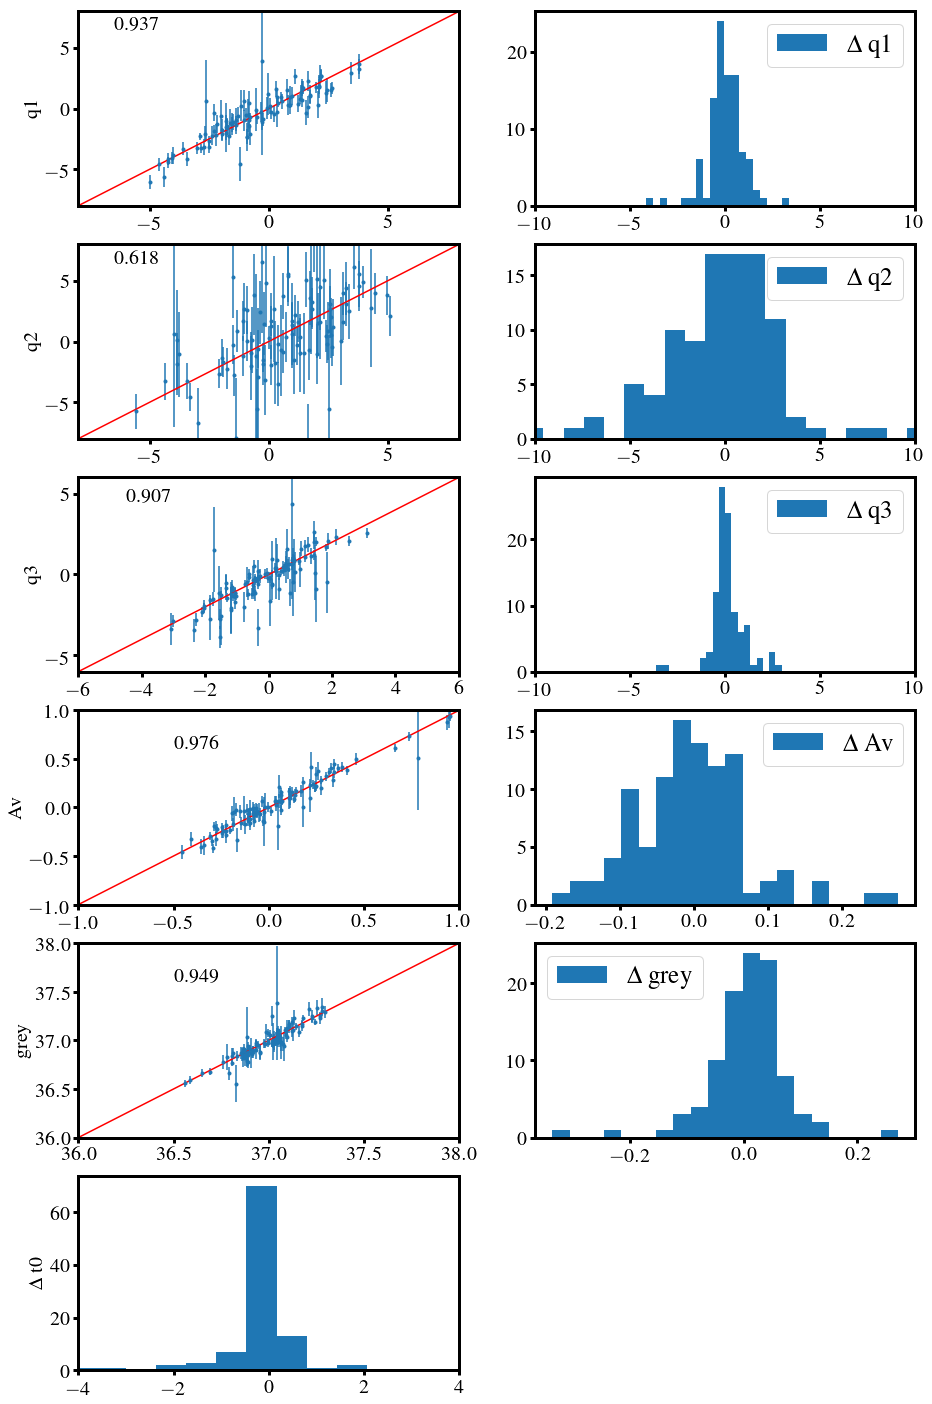

In [34]:
LIM = [8,8,6]

plt.figure(figsize=(15, 25))
t0_init = np.zeros(len(res))
for i in range(6):
    plt.subplot(6, 2, 2*i+1)
    if 2*i+1 < 10:
        plt.plot([-100.,100.],[-100.,100.],color='r')
        plt.ylabel(ss._param_names[i])
        plt.errorbar(samples[:,i], res[:, i], yerr=res_errors[:, i], fmt='.')
        cor = Statistics.correlation_weighted(samples[:,i], res[:, i],w=1./res_errors[:, i])
        if 2*i+1 <= 5:
            plt.text(-LIM[i]+1.5, LIM[i]-1.5, round(cor,3) , fontweight = 'bold', fontsize = 20)
            plt.ylim(-LIM[i],LIM[i])
            plt.xlim(-LIM[i],LIM[i])
        if 2*i+1 == 7:
            plt.text(-0.5, 0.6, round(cor,3) , fontweight = 'bold', fontsize = 20)
            plt.ylim(-1,1.)
            plt.xlim(-1.,1.)   
        if 2*i+1 == 9:
            plt.text(36.5, 37.6, round(cor,3) , fontweight = 'bold', fontsize = 20)
            plt.ylim(36.,38.)
            plt.xlim(36.,38.)  
    if 2*i+1 == 11:
        plt.hist(res[:, i])
        plt.ylabel('$\Delta$ t0')
        plt.xlim(-4,4)
    if 2*(i+1) < 11:
        plt.subplot(6, 2, 2*(i+1))
        plt.hist(samples[:,i]-res[:, i],20, label='$\Delta$ '+ss._param_names[i]) 
        plt.legend()
        if 2*i+1 <= 5:
            plt.xlim(-10,10)
         
       
pdffile = result_path+'results_pSNFBVR.pdf'
plt.savefig(pdffile, bbox_inches='tight')
plt.show()